##Load and Split MNIST dataset

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [5]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


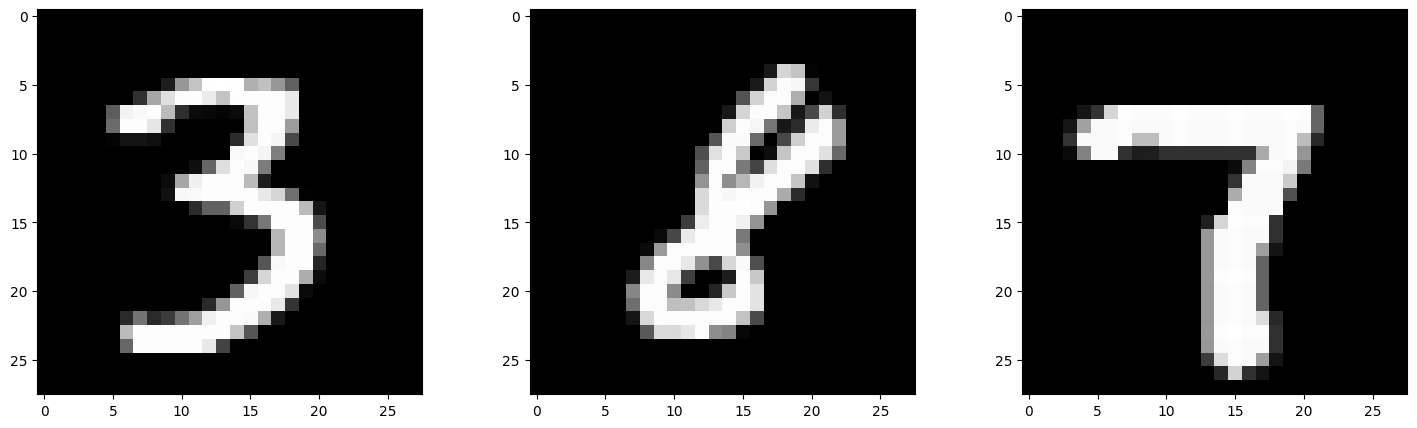

In [6]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap="gray")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

##Data Preprocessing

In [7]:
#feature transformation and normalisation (input)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

In [8]:
#one hot label encoding (output)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

##Neural Network Model building

In [14]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# define model
model = tf.keras.Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# compile model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [18]:
# train model
training_results = model.fit(X_train,
                             y_train,
                             epochs=21,
                             batch_size=64,
                             validation_data=(X_valid, y_valid));

Epoch 1/21
782/782 [==============================] - 5s 6ms/step - loss: 0.2821 - accuracy: 0.9179 - val_loss: 0.1535 - val_accuracy: 0.9536
Epoch 2/21
782/782 [==============================] - 5s 6ms/step - loss: 0.1227 - accuracy: 0.9634 - val_loss: 0.1508 - val_accuracy: 0.9542
Epoch 3/21
782/782 [==============================] - 4s 6ms/step - loss: 0.0849 - accuracy: 0.9738 - val_loss: 0.0979 - val_accuracy: 0.9716
Epoch 4/21
782/782 [==============================] - 5s 6ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0859 - val_accuracy: 0.9740
Epoch 5/21
782/782 [==============================] - 6s 7ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.0964 - val_accuracy: 0.9718
Epoch 6/21
782/782 [==============================] - 4s 5ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0926 - val_accuracy: 0.9763
Epoch 7/21
782/782 [==============================] - 4s 6ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0946 - val_accuracy: 0.9763
Epoch 

In [19]:
# plot training results

def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

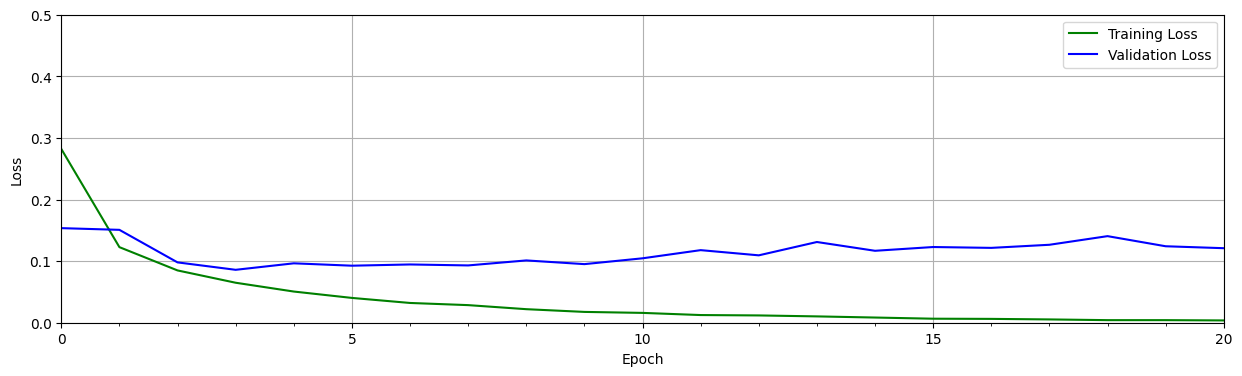

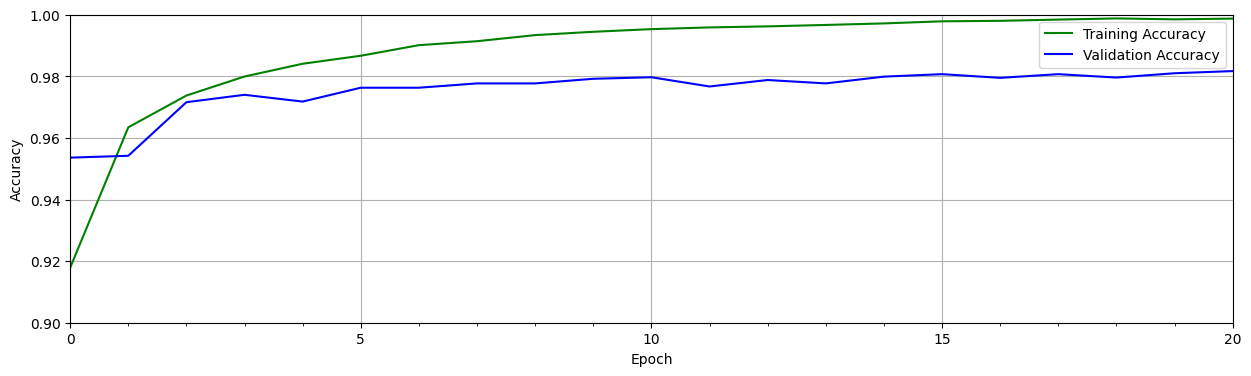

In [22]:
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 0.5],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.9, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

##Model Evaluation

In [24]:
predictions = model.predict(X_test)
index = 0  # up to 9999
print("Ground truth for test digit: ", y_test[index])
print("\n")
print("Predictions for each class:\n")
for i in range(10):
    print("digit:", i, " probability: ", predictions[index][i])

313/313 [==============================] - 1s 2ms/step
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

digit: 0  probability:  3.004073e-20
digit: 1  probability:  2.0966282e-21
digit: 2  probability:  7.9475217e-16
digit: 3  probability:  1.1418299e-17
digit: 4  probability:  3.1089046e-21
digit: 5  probability:  1.3695613e-24
digit: 6  probability:  2.0061709e-30
digit: 7  probability:  0.99999994
digit: 8  probability:  4.220327e-19
digit: 9  probability:  1.20639176e-14


In [25]:
predictions = model.predict(X_test)

predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 1s 3ms/step


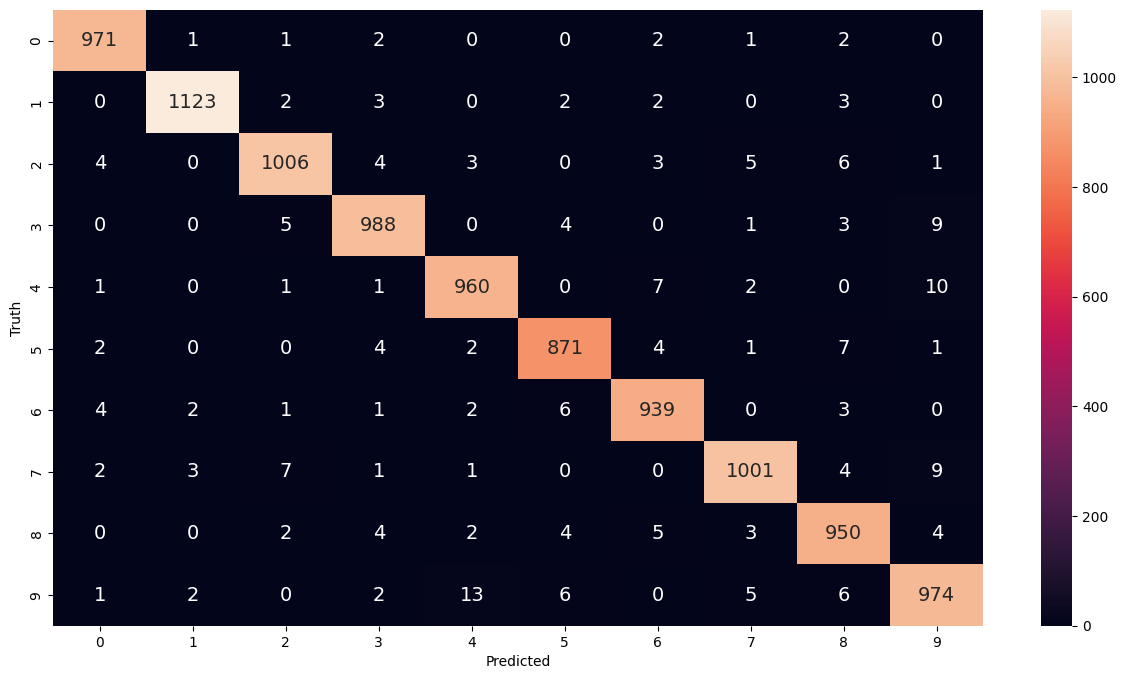

In [26]:
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()